In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from data_utils import load_CIFAR10

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data size is {0}'.format(X_train.shape))
print('Training labels size is {0}'.format(y_train.shape))
print('Testing data size is {0}'.format(X_test.shape))
print('Testing labels size is {0}'.format(y_test.shape))

Training data size is (50000, 32, 32, 3)
Training labels size is (50000,)
Testing data size is (10000, 32, 32, 3)
Testing labels size is (10000,)


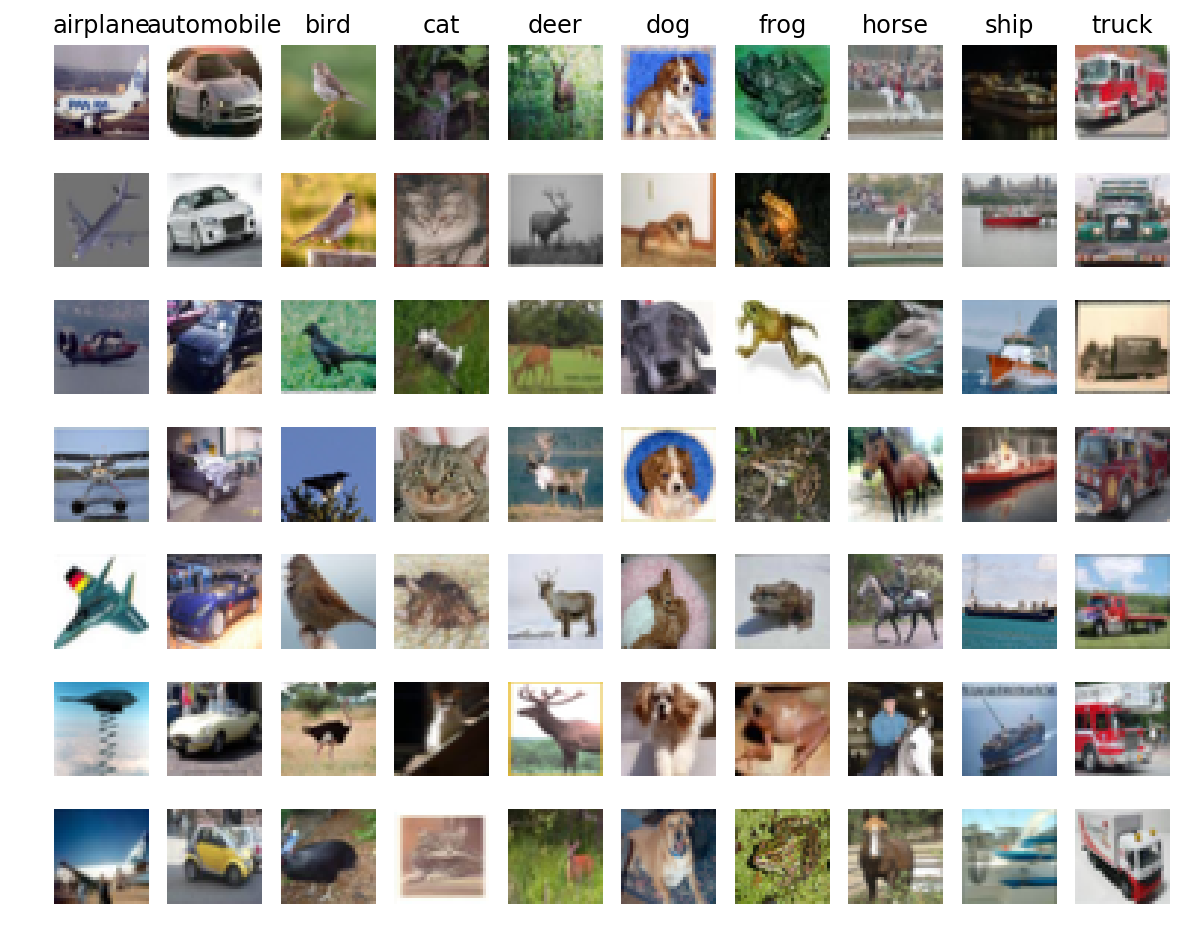

In [3]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
sample_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, sample_per_class, replace = False)
    for i, idx in enumerate(idxs):
        plot_index = y + (num_classes * i) + 1
        plt.subplot(sample_per_class, num_classes, plot_index)
        plt.imshow(np.uint8(X_train[idx]))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
num_training=49000
num_validation=1000
num_test=1000
num_dev=500

mask = range(num_training, num_training+num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_training, num_dev, replace = False)
X_dev = X_train[mask]
y_dev = y_train[mask]

print('Training data size is {0}'.format(X_train.shape))
print('Training labels size is {0}'.format(y_train.shape))
print('Validation data size is {0}'.format(X_val.shape))
print('Validation labels size is {0}'.format(y_val.shape))
print('Dev data size is {0}'.format(X_dev.shape))
print('Dev labels size is {0}'.format(y_dev.shape))
print('Testing data size is {0}'.format(X_test.shape))
print('Testing labels size is {0}'.format(y_test.shape))

Training data size is (49000, 32, 32, 3)
Training labels size is (49000,)
Validation data size is (1000, 32, 32, 3)
Validation labels size is (1000,)
Dev data size is (500, 32, 32, 3)
Dev labels size is (500,)
Testing data size is (10000, 32, 32, 3)
Testing labels size is (10000,)


In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print('Training data size is {0}'.format(X_train.shape))
print('Training labels size is {0}'.format(y_train.shape))
print('Validation data size is {0}'.format(X_val.shape))
print('Validation labels size is {0}'.format(y_val.shape))
print('Dev data size is {0}'.format(X_dev.shape))
print('Dev labels size is {0}'.format(y_dev.shape))
print('Testing data size is {0}'.format(X_test.shape))
print('Testing labels size is {0}'.format(y_test.shape))

Training data size is (49000, 3072)
Training labels size is (49000,)
Validation data size is (1000, 3072)
Validation labels size is (1000,)
Dev data size is (500, 3072)
Dev labels size is (500,)
Testing data size is (10000, 3072)
Testing labels size is (10000,)


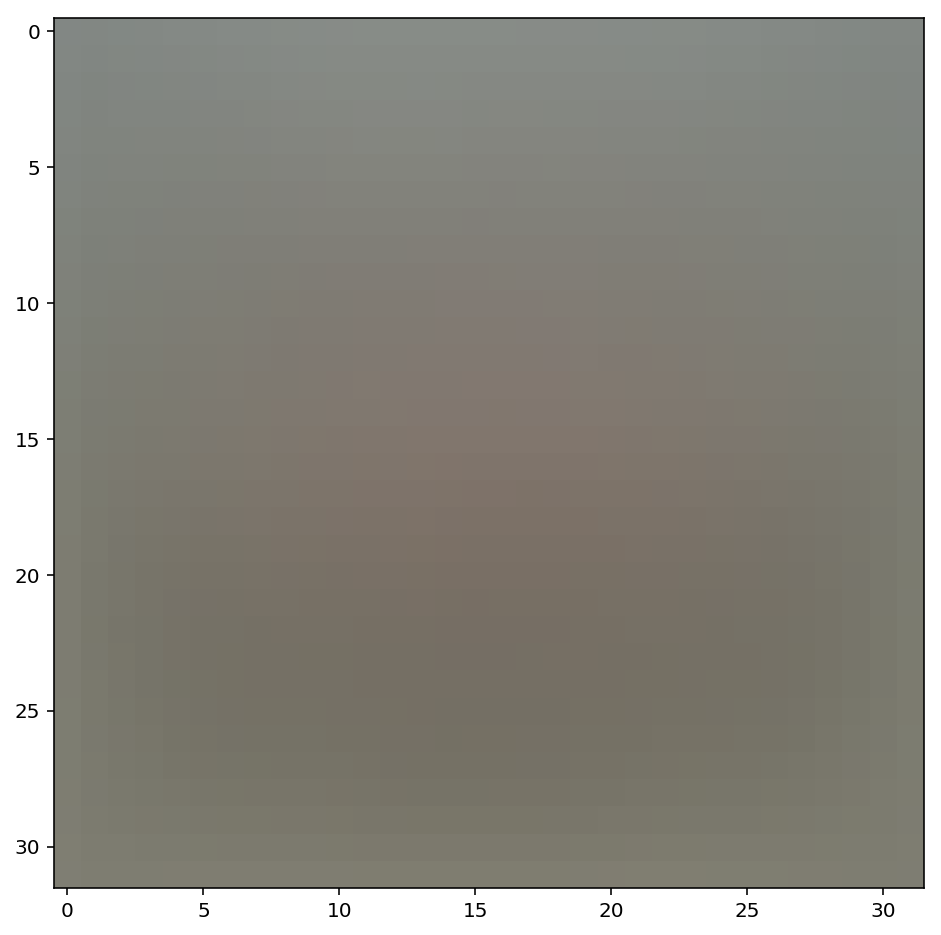

In [6]:
mean_image = np.mean(X_train, axis = 0)
mean_image_reshaped = np.reshape(mean_image, (32, 32, 3))

plt.imshow(np.uint8(mean_image_reshaped))
plt.show()

In [7]:
X_train -= mean_image
X_test -= mean_image
X_val -= mean_image
X_dev -= mean_image

print('Training data size is {0}'.format(X_train.shape))
print('Training labels size is {0}'.format(y_train.shape))
print('Validation data size is {0}'.format(X_val.shape))
print('Validation labels size is {0}'.format(y_val.shape))
print('Dev data size is {0}'.format(X_dev.shape))
print('Dev labels size is {0}'.format(y_dev.shape))
print('Testing data size is {0}'.format(X_test.shape))
print('Testing labels size is {0}'.format(y_test.shape))

Training data size is (49000, 3072)
Training labels size is (49000,)
Validation data size is (1000, 3072)
Validation labels size is (1000,)
Dev data size is (500, 3072)
Dev labels size is (500,)
Testing data size is (10000, 3072)
Testing labels size is (10000,)


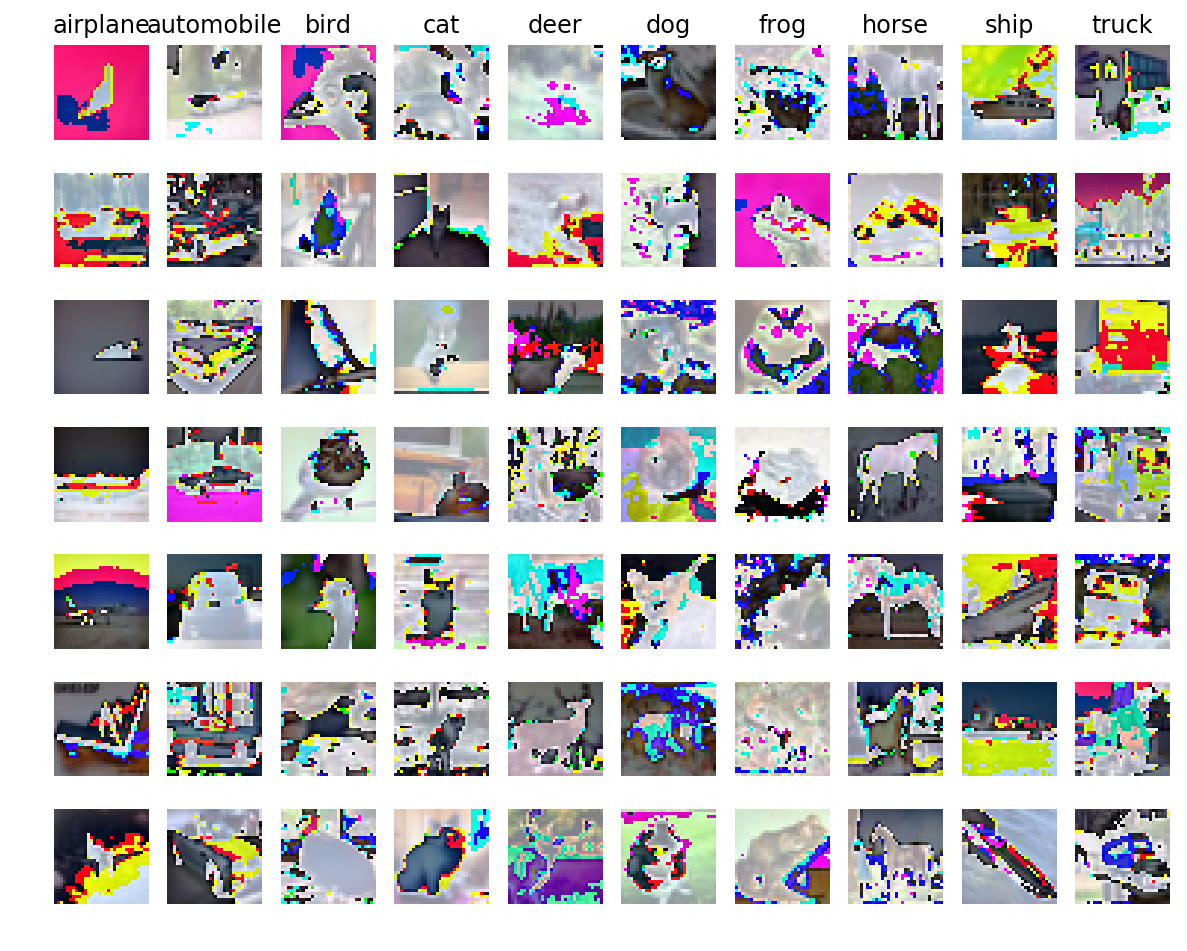

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
sample_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, sample_per_class, replace = False)
    for i, idx in enumerate(idxs):
        plot_index = y + (num_classes * i) + 1
        plt.subplot(sample_per_class, num_classes, plot_index)
        plt.imshow(np.uint8(np.reshape(X_train[idx],(32, 32, 3))))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [9]:
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_dev = np.hstack((X_dev, np.ones((X_dev.shape[0], 1))))
X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

print('Training data size is {0}'.format(X_train.shape))
print('Training labels size is {0}'.format(y_train.shape))
print('Validation data size is {0}'.format(X_val.shape))
print('Validation labels size is {0}'.format(y_val.shape))
print('Dev data size is {0}'.format(X_dev.shape))
print('Dev labels size is {0}'.format(y_dev.shape))
print('Testing data size is {0}'.format(X_test.shape))
print('Testing labels size is {0}'.format(y_test.shape))

Training data size is (49000, 3073)
Training labels size is (49000,)
Validation data size is (1000, 3073)
Validation labels size is (1000,)
Dev data size is (500, 3073)
Dev labels size is (500,)
Testing data size is (10000, 3073)
Testing labels size is (10000,)


In [10]:
W = np.random.rand(3073, 10) * 0.0001
print(W.shape)

(3073, 10)


In [11]:
def cross_entroy_loss(y_prob, y):
    total_cross_entropy = np.mean(-np.log(y_prob[np.arange(y_prob.shape[0]), y]))
    return total_cross_entropy

In [12]:
def softmax(logits):
    num = np.exp(logits)
    den = np.sum(num, axis = 1)[:, None]
    return num / den

In [13]:
def softmax_loss_naive(W, X, y, reg):
    num_train = X.shape[0]
    loss = 0.0
    dw = np.zeros(W.shape)
    logits = np.dot(X, W)
    probabilities = softmax(logits)
    loss = cross_entroy_loss(probabilities, y)
    loss += 0.5 * reg * np.sum(W ** 2)
    probabilities[np.arange(probabilities.shape[0]), y] -= 1
    dw = (X.T).dot(probabilities)/ num_train
    dw += reg * W
    return loss, dw

In [14]:
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)

In [15]:
print('loss: {0}'.format(loss))
print('sanity check: {0}'.format(-np.log(0.1)))

loss: 2.29834002354315
sanity check: 2.3025850929940455


In [16]:
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)

from gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.05818218882236436 analytic: 0.058182149040476354, relative error: 3.418735390640876e-07 
numerical: -0.6279145565724065 analytic: -0.6279146034264556, relative error: 3.730925397929234e-08 
numerical: -3.4281110944389677 analytic: -3.428111247741692, relative error: 2.2359648891441207e-08 
numerical: 0.562168394613316 analytic: 0.5621683657983642, relative error: 2.5628399678460627e-08 
numerical: 0.01185026674566103 analytic: 0.01185022096453307, relative error: 1.9316534123514603e-06 
numerical: 0.8383236815845406 analytic: 0.8383236586867804, relative error: 1.3656873269330496e-08 
numerical: -1.1506704852948246 analytic: -1.1506705067590217, relative error: 9.326821692433313e-09 
numerical: -1.0608215154972456 analytic: -1.060821549901311, relative error: 1.6215765005645553e-08 
numerical: 2.4659049536746025 analytic: 2.4659048163112813, relative error: 2.785251815633017e-08 
numerical: -0.17357956154651075 analytic: -0.17357954923143534, relative error: 3.547386492693

In [17]:
class SoftmaxClassifier(object):
    
    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
        num_train, dim = X.shape
        num_classes = np.max(y) + 1
        self.W =  0.001 * np.random.randn(dim, num_classes)
        
        loss_history = []
        for it in range(num_iters):
            random_idxs = np.random.choice(np.arange(num_train), batch_size, replace = True)
            X_batch = X[random_idxs]
            y_batch = y[random_idxs]
            loss, grad = self.loss(self.W, X_batch, y_batch, reg)
            loss_history.append(loss)
            self.W -= learning_rate * grad
            if verbose and it % 100 == 0:
                print('iteration {0} / {1}: loss {2}'.format(it, num_iters, loss))
        return loss_history
    
    def cross_entroy_loss(self, y_prob, y):
        total_cross_entropy = np.mean(-np.log(y_prob[np.arange(y_prob.shape[0]), y]))
        return total_cross_entropy
    
    def softmax(self, logits):
        num = np.exp(logits)
        den = np.sum(num, axis = 1)[:, None]
        return num / den
    
    def predict(self, X):
        scores = X.dot(self.W)
        y_pred = np.argmax(scores, axis = 1)
        return y_pred
    
    def loss(self, W, X, y, reg):
        num_train = X.shape[0]
        loss = 0.0
        dw = np.zeros(W.shape)
        logits = np.dot(X, W)
        probabilities = self.softmax(logits)
        loss = self.cross_entroy_loss(probabilities, y)
        loss += 0.5 * reg * np.sum(W ** 2)
        probabilities[np.arange(probabilities.shape[0]), y] -= 1
        dw = (X.T).dot(probabilities)/ num_train
        dw += reg * W
        return loss, dw

In [18]:
import time
softmax = SoftmaxClassifier()
tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7, reg=5e4, num_iters=1500, verbose=True)
toc = time.time()
print('That took {0}'.format(toc - tic))

iteration 0 / 1500: loss 781.6322059942471
iteration 100 / 1500: loss 286.5678679364336
iteration 200 / 1500: loss 106.1841860427641
iteration 300 / 1500: loss 40.09292483028576
iteration 400 / 1500: loss 16.014120381609697
iteration 500 / 1500: loss 7.219423772913739
iteration 600 / 1500: loss 3.9303000663783445
iteration 700 / 1500: loss 2.761284941131572
iteration 800 / 1500: loss 2.347792498667917
iteration 900 / 1500: loss 2.2048270713183924
iteration 1000 / 1500: loss 2.1571200565689237
iteration 1100 / 1500: loss 2.1137919350360805
iteration 1200 / 1500: loss 2.0483004889902716
iteration 1300 / 1500: loss 2.1471173560726933
iteration 1400 / 1500: loss 2.0801845590747603
That took 5.098142862319946


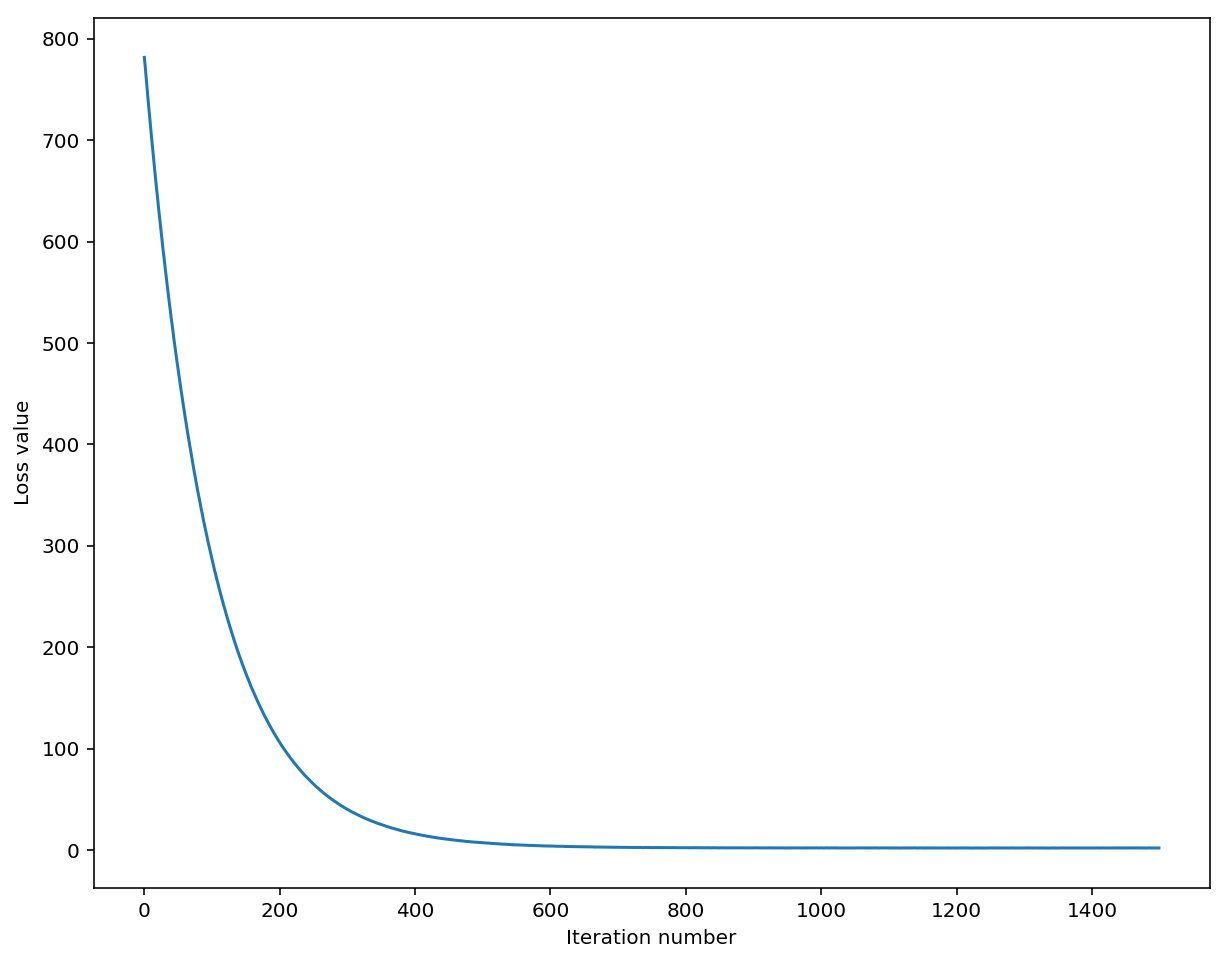

In [19]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [20]:
y_train_pred = softmax.predict(X_train)
print('training accuracy: {0}'.format(np.mean(y_train == y_train_pred)))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {0}'.format(np.mean(y_val == y_val_pred)))

training accuracy: 0.33308163265306123
validation accuracy: 0.351


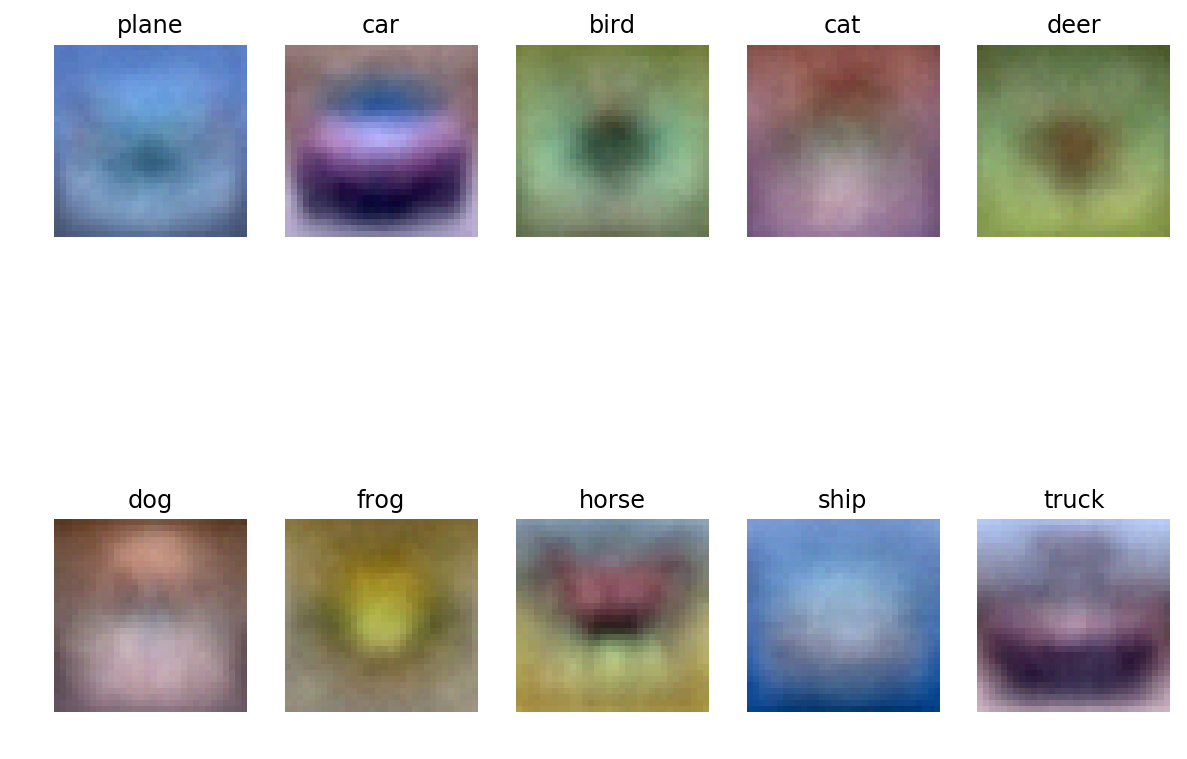

In [21]:
w = softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])